# Data Wrangling - Optimize and Verify Data

Load, clean, optimize and pickle the Chicago tree trims data. The wrangling of the tree trims dataset is split into two parts to keep the notebook size manageable. This notebook is part one. Part two is located in the `data-wrangling-deduplicate.ipynb` notebook.

**Project Notebooks Execution Order**
* 1-data-wrangling-optimize-verify.ipynb
* [2-data-wrangling-deduplicate.ipynb](2-data-wrangling-deduplicate.ipynb)
* [3-exploratory-data-analysis.ipynb](3-exploratory-data-analysis.ipynb)
* [4-forecasting-opened-requests.ipynb](4-forecasting-opened-requests.ipynb)
* [5-forecasting-closed-requests.ipynb](5-forecasting-closed-requests.ipynb)
* [6-summary.ipynb](6-summary.ipynb)

For a full explanation of this project, see the `README.md` file at the project root or the `6-summary.ipynb` notebook.

# Import Packages and Modules

In [1]:
import os

from IPython.core.interactiveshell import InteractiveShell
import missingno as msno
import pandas as pd

# Settings

Configure settings for the notebook, plots and files. Set `ast_node_interactivity` to display the output of all expressions in a cell so that more than one data frame can be printed at a time in a single cell. In this notebook, semicolons at the end of `msno` statements are used to suppress the printing of `matplotlib` objects in cell outputs. Load functions called in notebook.

In [2]:
# Notebook settings
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Plot settings
# This color is hex color #4aa6ff. The missingno package requires the 
# color parameter in this format.
c_default = (74/255, 166/255, 255/255)

# File settings
data_raw = os.path.abspath('./data/raw/')
data_interim = os.path.abspath('./data/interim/')
data_processed = os.path.abspath('./data/processed/')

# Import preprocessing functions
%run preprocess_data.py

# Load Data
## Download Data

In [3]:
tree_trims_csv = 'tree_trims.csv'
if not os.path.isfile(os.path.join(data_raw, tree_trims_csv)):
    download_urls = {
        'tree_trims.csv': 'https://data.cityofchicago.org/api/views/uxic-zsuj/rows.csv?accessType=DOWNLOAD'
    }
    get_data(download_urls, data_raw)

## Create Data Frame

In [4]:
df_tt = read_data('Chicago Tree Trims', data_raw, tree_trims_csv)

Chicago Tree Trims
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362957 entries, 0 to 362956
Data columns (total 16 columns):
creation_date              362957 non-null object
status                     362957 non-null object
completion_date            351630 non-null object
service_request_number     362957 non-null object
type_of_service_request    362957 non-null object
location_of_trees          241453 non-null object
street_address             362957 non-null object
zip_code                   360447 non-null float64
x_coordinate               362849 non-null float64
y_coordinate               362849 non-null float64
ward                       362910 non-null float64
police_district            362910 non-null float64
community_area             362910 non-null float64
latitude                   362849 non-null float64
longitude                  362849 non-null float64
location                   362849 non-null object
dtypes: float64(8), object(8)
memory usage: 213.7 MB
None




# Clean Tree Trims Data
## Review Data

In [5]:
review_data(df_tt)

,creation_date,status,completion_date,service_request_number,type_of_service_request,location_of_trees,street_address,zip_code,x_coordinate,y_coordinate,ward,police_district,community_area,latitude,longitude,location
0,09/23/2012,Completed - Dup,08/22/2014,12-01658502,Tree Trim,NaN,9233 S OAKLEY AVE,60620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,09/02/2011,Completed,10/07/2014,11-03713147,Tree Trim,Parkway,6300 N HERMITAGE AVE,60660.0,NaN,NaN,40.0,24.0,77.0,NaN,NaN,NaN
2,12/27/2013,Completed - Dup,04/21/2015,13-01901794,Tree Trim,Parkway,3651 S UNION AVE,60621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,creation_date,status,completion_date,service_request_number,type_of_service_request,location_of_trees,street_address,zip_code,x_coordinate,y_coordinate,ward,police_district,community_area,latitude,longitude,location
362954,12/19/2016,Completed,12/19/2016,16-08361234,Tree Trim,NaN,5258 W WASHINGTON BLVD,60644.0,1.141245e+06,1.900245e+06,28.0,15.0,25.0,41.882349,-87.756808,"(41.882348566869, -87.756808455742)"
362955,10/11/2011,Completed - Dup,10/19/2011,11-03931492,Tree Trim,Parkway,452 E 89TH ST,60619.0,1.180820e+06,1.846071e+06,6.0,6.0,44.0,41.732869,-87.613157,"(41.732869439201, -87.613156789631)"
362956,06/10/2016,Completed,07/14/2016,16-04030301,Tree Trim,Parkway,3701 N SPAULDING AVE,60618.0,1.153730e+06,1.924418e+06,33.0,17.0,16.0,41.948442,-87.710320,"(41.948442263864, -87.710319971466)"


,creation_date,status,completion_date,service_request_number,type_of_service_request,location_of_trees,street_address,zip_code,x_coordinate,y_coordinate,ward,police_district,community_area,latitude,longitude,location
357561,05/05/2016,Completed,06/14/2016,16-03090266,Tree Trim,NaN,5934 W OHIO ST,60644.0,1.136778e+06,1.903375e+06,29.0,15.0,25.0,41.891018,-87.773138,"(41.89101848699, -87.773137758699)"
142714,07/09/2010,Completed,05/16/2011,10-01044177,Tree Trim,Parkway,3540 S UNION AVE,60609.0,1.172212e+06,1.881412e+06,11.0,9.0,60.0,41.830043,-87.643653,"(41.83004310699, -87.64365334942)"
197571,10/27/2014,Completed,10/28/2014,14-01843223,Tree Trim,Parkway,5718 N ARTESIAN AVE,60659.0,1.158960e+06,1.937894e+06,40.0,20.0,2.0,41.985314,-87.690726,"(41.985314144958, -87.690725548744)"


,is_null
creation_date,0
status,0
completion_date,11327
service_request_number,0
type_of_service_request,0
location_of_trees,121504
street_address,0
zip_code,2510
x_coordinate,108
y_coordinate,108


Drop columns that are not relevant to the analysis.

In [6]:
print('df_tt shape before: {}'.format(df_tt.shape))
df_tt.drop(
    labels=['x_coordinate', 'y_coordinate', 'ward', 'police_district'],
    axis='columns',
    inplace=True)
print('df_tt shape after: {}'.format(df_tt.shape))

df_tt shape before: (362957, 16)
df_tt shape after: (362957, 12)


Visualize the location of nulls in the dataset to see if they are clustered in certain segments of the dataset. Clustered nulls could indicate a data collection problem in the dataset.

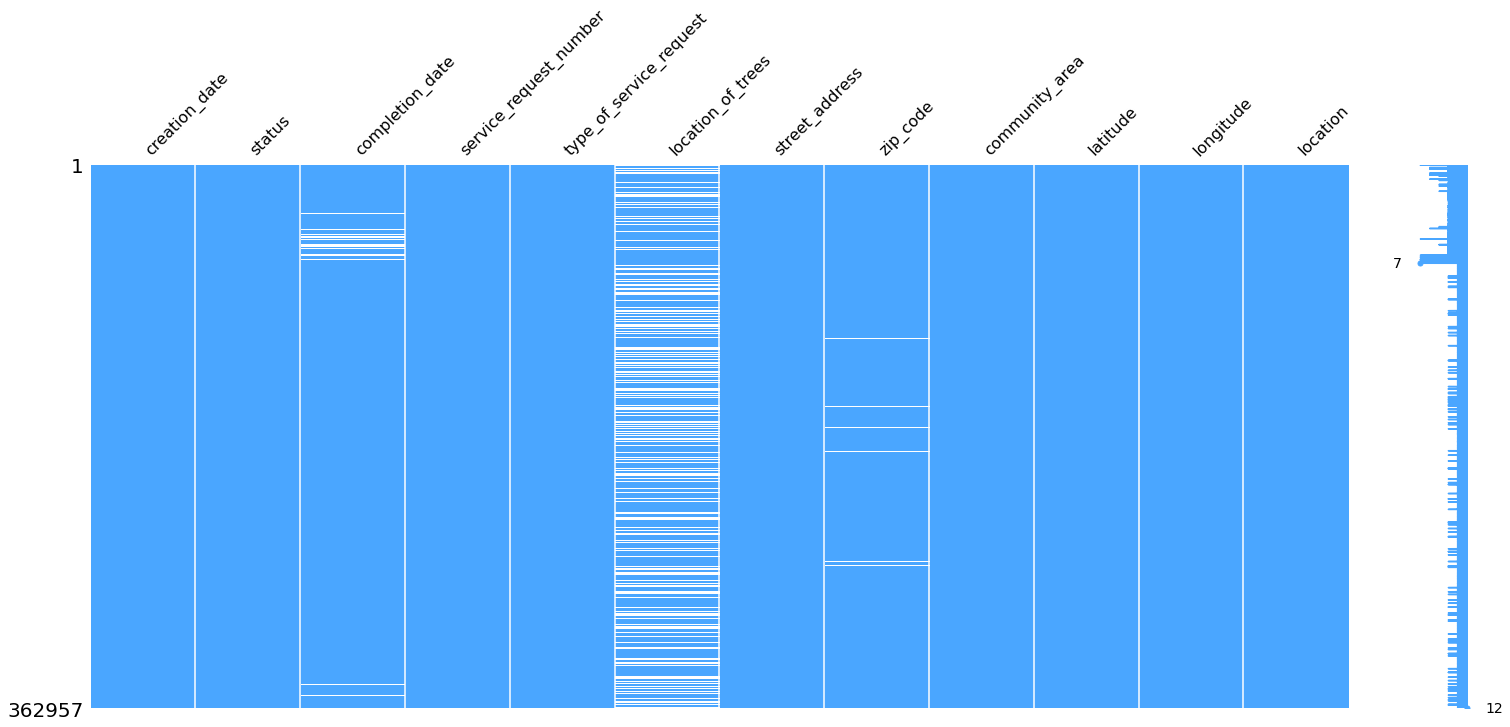

In [7]:
msno.matrix(df_tt, color=c_default);

The pattern of nulls in the dataset are not problematic. Null are scattered throughout the `location_of_trees` variable, and the nulls in `completion_date` are clustered at the bottom of the dataset where you would expect them to be.

## Optimize Data Frame

Store the df_tt memory usage for comparison against optimized data frame.

In [8]:
df_tt_mem_before = memory_usage(df_tt)

### Dates

Convert the date columns to datetime types.

In [9]:
df_tt['creation_date_dt'] = pd.to_datetime(df_tt['creation_date'],
                                           format='%m/%d/%Y',
                                           errors='coerce')
df_tt['completion_date_dt'] = pd.to_datetime(df_tt['completion_date'],
                                             format='%m/%d/%Y',
                                             errors='coerce')

Verify the date conversion. Check the number of nulls in date columns, converted dates, and converted NaNs to NaTs.

In [10]:
dt_nulls = [(len(df_tt[pd.isnull(df_tt['creation_date_dt'])])),
            (len(df_tt[pd.isnull(df_tt['completion_date_dt'])]))]
(pd.Series(dt_nulls, index=['creation_date_dt', 'completion_date_dt'],
           name='nulls').to_frame())
cols_dates = ['creation_date', 'creation_date_dt', 'completion_date',
              'completion_date_dt']

df_tt[cols_dates].sample(3)
df_tt[df_tt['completion_date'].isnull()][cols_dates].sample(3)

,nulls
creation_date_dt,0
completion_date_dt,11327


,creation_date,creation_date_dt,completion_date,completion_date_dt
159184,08/11/2015,2015-08-11,05/06/2016,2016-05-06
177684,08/12/2013,2013-08-12,12/30/2014,2014-12-30
242202,08/02/2013,2013-08-02,08/02/2013,2013-08-02


,creation_date,creation_date_dt,completion_date,completion_date_dt
39203,08/18/2018,2018-08-18,NaN,NaT
37102,08/16/2018,2018-08-16,NaN,NaT
63937,10/20/2018,2018-10-20,NaN,NaT


Now that the date columns have been converted, drop `creation_date` and `completion_date` columns to reduce the memory footprint of the data frame. Move the newly created datetime columns to the far left of the data frame for a more prominent location; they will be used more heavily than other columns in the data frame.

In [11]:
print('df_tt shape before: {}'.format(df_tt.shape))
df_tt.drop(['creation_date', 'completion_date'], axis='columns', inplace=True)
df_cols = df_tt.columns.tolist()
df_cols = df_cols[-2:] + df_cols[:-2]
df_tt = df_tt[df_cols]
print('df_tt shape after: {}'.format(df_tt.shape))

df_tt shape before: (362957, 14)
df_tt shape after: (362957, 12)


Order the data frame by creation date and Service Request Number. Then reorder the index.

In [12]:
(df_tt.sort_values(['creation_date_dt', 'service_request_number'],
                   inplace=True))
df_tt.reset_index(drop=True, inplace=True)

df_tt.head(3)
df_tt.tail(3)

,creation_date_dt,completion_date_dt,status,service_request_number,type_of_service_request,location_of_trees,street_address,zip_code,community_area,latitude,longitude,location
0,1971-01-13,2015-11-19,Completed,15-06272964,Tree Trim,NaN,5101 N NATOMA AVE,60656.0,10.0,41.973820,-87.792758,"(41.973820008285, -87.792758094111)"
1,1971-02-12,2014-11-20,Completed - Dup,14-01587763,Tree Trim,NaN,5851 N MEDINA AVE,60646.0,10.0,41.987965,-87.781160,"(41.98796509208, -87.781159682034)"
2,1971-02-12,2014-09-19,Completed,14-01587763,Tree Trim,NaN,5851 N MEDINA AVE,60646.0,10.0,41.987965,-87.781160,"(41.98796509208, -87.781159682034)"


,creation_date_dt,completion_date_dt,status,service_request_number,type_of_service_request,location_of_trees,street_address,zip_code,community_area,latitude,longitude,location
362954,2018-12-17,NaT,Open - Dup,18-03384518,Tree Trim,Parkway,5097 W GLADYS AVE,60644.0,25.0,41.875775,-87.753300,"(41.875775148907, -87.753299858075)"
362955,2018-12-18,NaT,Open,18-03388513,Tree Trim,Parkway,6242 N LAKEWOOD AVE,60660.0,77.0,41.995300,-87.662933,"(41.995299874905, -87.662932795885)"
362956,2018-12-18,NaT,Open,18-03388679,Tree Trim,NaN,1830 N KARLOV AVE,60639.0,20.0,41.914091,-87.728908,"(41.914091439894, -87.728908401142)"


Drop any rows where `creation_date_dt` is greater than 2018-10-31. The Chicago Tree Trims dataset is updated daily in Chicago's online data portal; a fresh download of the data may contain observations after 2018-10-31 that need additional wrangling not specified in this notebook.

In [13]:
print('df_tt shape before: {}'.format(df_tt.shape))
df_tt = df_tt[df_tt['creation_date_dt'] <= '2018-10-31']
print('df_tt shape after: {}'.format(df_tt.shape))

df_tt shape before: (362957, 12)
df_tt shape after: (360484, 12)


### Integers

In [14]:
int_cols = ['zip_code', 'community_area']
df_tt[int_cols].isnull().sum().to_frame(name='nulls')

,nulls
zip_code,2508
community_area,47


NaN values are not supported in integer columns. Add temporary zeros in place of null rows so these columns can be converted to integers to save memory. Populate these columns with the missing data further down in this notebook.

In [15]:
df_tt[int_cols] = df_tt[int_cols].fillna(value=0)
df_tt[df_tt['zip_code'] == 0][int_cols].head(3)

df_tt[int_cols] = df_tt[int_cols].astype('int')
df_tt[int_cols].sample(5)

,zip_code,community_area
73,0.0,1.0
74,0.0,3.0
75,0.0,6.0


,zip_code,community_area
120870,60608,30
293587,60619,48
201373,60647,22
102270,60643,72
108204,60625,4


### Floats

In [16]:
float_cols = ['latitude', 'longitude']

df_tt[float_cols] = df_tt[float_cols].astype('float')
df_tt[float_cols].sample(5)

,latitude,longitude
249117,41.793537,-87.675693
250728,41.661905,-87.640179
278497,41.739259,-87.649789
73937,41.902020,-87.731207
176561,41.995360,-87.736186


### Categories

In [17]:
category_cols = ['status', 'type_of_service_request', 'location_of_trees']

for col in category_cols:
    df_tt[col].value_counts().to_frame('count')

,count
Completed,287288
Completed - Dup,63307
Open,8366
Open - Dup,1523


,count
Tree Trim,360484


,count
Parkway,230251
Alley,5211
Vacant Lot,4366


In [18]:
df_tt[category_cols] = df_tt[category_cols].astype('category')
df_tt[category_cols].sample(5)

,status,type_of_service_request,location_of_trees
108182,Completed,Tree Trim,Parkway
323597,Completed,Tree Trim,Parkway
127934,Completed,Tree Trim,NaN
65632,Completed,Tree Trim,NaN
216707,Completed - Dup,Tree Trim,NaN


### Review Memory Usage and Data Types

In [19]:
df_tt.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360484 entries, 0 to 360483
Data columns (total 12 columns):
creation_date_dt           360484 non-null datetime64[ns]
completion_date_dt         350595 non-null datetime64[ns]
status                     360484 non-null category
service_request_number     360484 non-null object
type_of_service_request    360484 non-null category
location_of_trees          239828 non-null category
street_address             360484 non-null object
zip_code                   360484 non-null int64
community_area             360484 non-null int64
latitude                   360376 non-null float64
longitude                  360376 non-null float64
location                   360376 non-null object
dtypes: category(3), datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 100.8 MB


In [20]:
def format_mem(mem):
    '''Format Data Frame memory in MB.
    
    Parameters
    ----------
    mem : float
        Float to be formatted in MB.

    Returns
    -------
    Float formatted in MB.
    '''
    return '{0:.2f}'.format(mem) + ' MB'

df_tt_mem_after = memory_usage(df_tt)
df_tt_mem_saved = df_tt_mem_before - df_tt_mem_after

mem_saved = {
    'df_tt memory before': format_mem(df_tt_mem_before),
    'df_tt memory after': format_mem(df_tt_mem_after),
    'Memory saved': format_mem(df_tt_mem_saved)
}

pd.DataFrame.from_dict(mem_saved, orient='index', columns=['Memory'])

,Memory
df_tt memory before,202.63 MB
df_tt memory after,100.83 MB
Memory saved,101.80 MB


## Verify Data

### Verify Status and Completion Dates

Are there any records where the `status` is "Open" and the `completion_date_dt` is populated? Are there any records where status is "Completed" and `completion_date_dt` is null?

In [21]:
num_status_conflict = df_tt[df_tt['completion_date_dt'].notnull()
                            & (df_tt['status'] == 'Open')].shape[0]
num_status_conflict = df_tt[df_tt['completion_date_dt'].isnull()
                            & (df_tt['status'] == 'Completed')].shape[0]

print('Number of open requests with a completion date: {}'
      .format(num_status_conflict))
print('Number of closed requests without a completion date: {}'
      .format(num_status_conflict))

Number of open requests with a completion date: 0
Number of closed requests without a completion date: 0


### Verify Sample Sizes by Year

Group the data by year to verify whether or not the data is spread evenly across the dataset.

In [22]:
df_tt.groupby(df_tt['creation_date_dt'].dt.year).size().to_frame('count')

,count
creation_date_dt,
1971,3
1972,40
1973,12
1984,18
1998,1
1999,10
2000,5
2002,3
2003,5


The majority of the data in the years previous to 2010 are below a threshold of 30 observations per year, which is a small sample size per grouping. Also, it seems unlikely that there were only 5 requests for tree maintenance in 2009 in a city the size of Chicago. Chicago's 311 system for requesting city services was implemented in 1999, but perhaps a robust database to track tree trim requests was not fully implemented until 2010. Regardless, there are not enough observations before 2010 for analysis and there is sufficient data from 2010 onwards. Remove observations prior to 2010 from the dataset. 

In [23]:
print('df_tt shape before: {}'.format(df_tt.shape))
df_tt = df_tt[df_tt['creation_date_dt'].dt.year > 2009]
print('df_tt shape after: {}'.format(df_tt.shape))

df_tt shape before: (360484, 12)
df_tt shape after: (360366, 12)


# Export Data

Export the data to `/data/interim/` directory. Pickle the data frame to preserve its attributes for reading into subsequent notebooks.

**Chicago Tree Trims**

In [24]:
export_pickle('chicago-tree-trims', df_tt, data_interim)

chicago-tree-trims: (360366, 12)
